Sure! Here's a guide that explains what the script in your Jupyter notebook does, broken down by its main components:

### Overview
This Jupyter notebook conducts a comprehensive analysis of experimental data from a psychological study, focusing on the influence of task difficulty on accuracy and reaction times, and exploring movement trajectories in response to different stimuli. It's used for detailed data manipulation, statistical analysis, and visualization to draw insights relevant to cognitive psychology and human-computer interaction.

### Key Components of the Notebook

#### 1. **Data Loading and Cleaning**
   - **Data Import:** The notebook begins by importing essential Python libraries such as `pandas` for data manipulation, `matplotlib` and `seaborn` for data visualization, and `numpy` for numerical operations. It then loads the experimental data from a JSON file.
   - **Initial Cleanup:** The script filters out rows from the dataset that are categorized under 'Control' conditions and those that contain 'NAN' values in the 'accuracy' (acc) column, ensuring the dataset only includes valid experimental data.

#### 2. **Data Preparation**
   - **Conversion of Data Types:** Converts the 'acc' column from boolean or string identifiers to integer values (1 for correct responses, 0 for incorrect), facilitating numerical analysis.
   - **Sample Size Calculation:** Calculates the number of unique participants in the study, which is used in subsequent analysis to normalize the data or as a reference in visualizations.

#### 3. **Aggregates**
   - **Grouping and Aggregation:** Computes the average accuracy and reaction times, grouped by different levels of task difficulty. This step is crucial for understanding how task difficulty influences participant performance.
   - **Visualization:** Utilizes seaborn's pointplot to graphically represent the effect of task difficulty on both accuracy and reaction times, allowing for a visual assessment of trends.

#### 4. **Trajectory Analysis**
   - **Trajectory Resampling:** For movement data (mouse trajectories), the notebook resamples the trajectories to a uniform length, making it possible to average them and compare across conditions.
   - **Visualization of Trajectories:** Plots the average resampled trajectories for different preceding and response conditions (e.g., red response following a red stimulus versus a blue stimulus), illustrating typical movement patterns and potentially highlighting strategic adjustments based on the stimulus-response sequence.

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as  np
warnings.filterwarnings('ignore')
df = pd.read_json(r"C:\Users\veoni\Documents\GitHub\MTE_DLAB\Squircle experiment\DF_clean.json")
####################
# extracting sample size
n = len(set(df.pt_num))

In [2]:
df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Calculate average accuracy and reaction time by difficulty level
avg_stats = df_acc.groupby(['difficulty', 'true_value'] ).agg({'acc': 'mean', 'rt': 'mean'}).reset_index()
print(avg_stats)

  difficulty true_value       acc        rt
0       Easy       Blue  0.864674  0.460808
1       Easy        Red  0.841806  0.467413
2       Hard       Blue  0.715600  0.480877
3       Hard        Red  0.667774  0.493310
4     Medium       Blue  0.785950  0.471630
5     Medium        Red  0.752135  0.478263


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


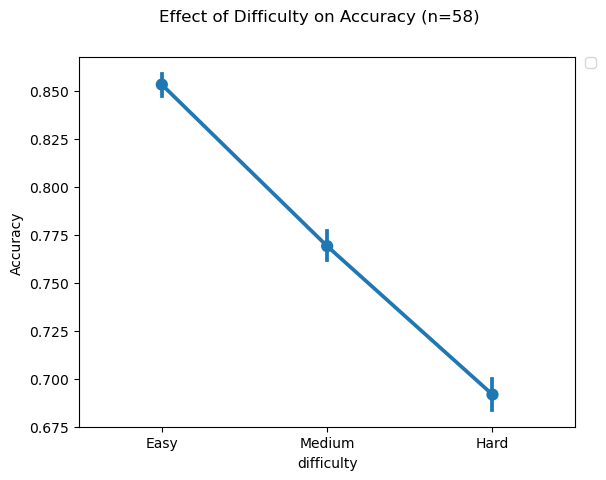

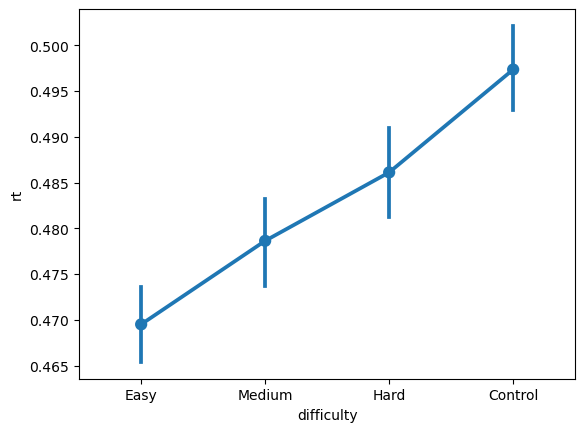

In [3]:
# Load the dataset
# Exclude rows where 'control' appears in either 'difficulty' or 'acc' column

df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]



# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

# checking the effect of masking
# for each measure of performance separately
for dv in ['acc']:
    if dv == 'rt':
        data = df[df['acc'] == 1]  # only take correct trials for RT
    elif dv == 'acc':
        data = df_acc

    # Rest of your analysis code
    plt.figure()
    plot = sns.pointplot(
        data=data,
        y=dv,
        x='difficulty',
        order=['Easy', 'Medium', 'Hard'],
        join=True

    )
    if dv == 'acc':
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of Difficulty on Accuracy (n={})".format(n))
    elif dv == 'rt':
        plt.ylabel("Reaction Time")
        plt.suptitle("Effect of Difficulty on Reaction Time (n={})".format(n))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

plt.figure()
plot = sns.pointplot(
    data=df[(df['acc'] == True) | (df['acc'] == 'Control')],
    y='rt',
    x='difficulty',
    order=['Easy', 'Medium', 'Hard', "Control"],
    join=True

)

In [4]:
df = df[(df['block_number'] != 'Training')]

# Now, 'traj_record' column contains lists of tuples
df_blue = df[df['choice'] == 'Blue']
df_red = df[df['choice'] == 'Red']
df_blue = df_blue.reset_index()
df_red = df_red.reset_index()

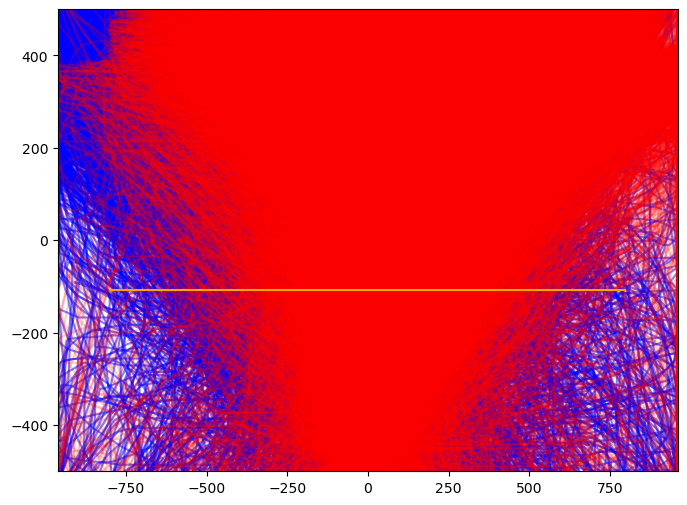

In [5]:

plt.figure(figsize=(8, 6))
for z in range(len(df_blue)):
#    if z == 88 or z == 99 or z == 127 or z == 195 or z == 210 or z == 247 or z == 279 or z ==339 or z == 457:
#        continue
    x_coords = [pos[0] for pos in df_blue['traj_record'][z]]
    y_coords = [pos[1] for pos in df_blue['traj_record'][z]]

    plt.plot(x_coords, y_coords, label='Mouse Trajectory', color='blue',alpha = 0.2)

for b in range(len(df_red)):
    x_red_coords = [pos[0] for pos in df_red['traj_record'][b]]
    y_red_coords = [pos[1] for pos in df_red['traj_record'][b]]
    
    # Create a new figure
   
    
    # Plot the mouse trajectory
   
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory', color='red', alpha = 0.2)
    #plt.scatter(x_coords, y_coords, color='red', s=4, label='Mouse Positions')
    
    
    # Add labels and title
    #plt.xlabel('X Position')
    #plt.ylabel('Y Position')
    #plt.title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    
plt.xlim(-960, 960)
plt.ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'orange')
# Add legend
#plt.legend()

# Show the plot
plt.show()


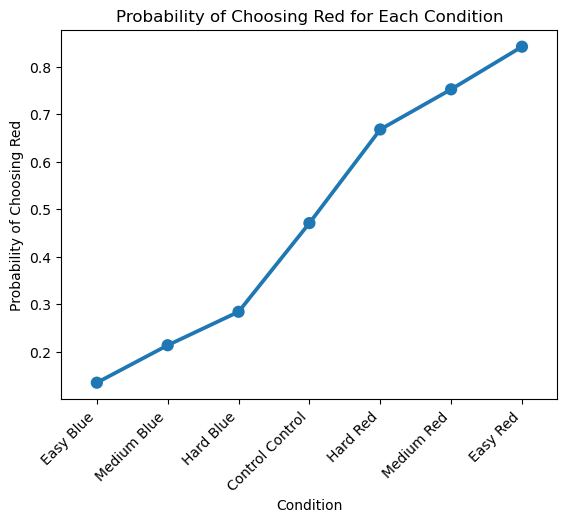

In [6]:
conditions = [
    ('Easy', 'Red'),
    ('Medium', 'Red'),
    ('Hard', 'Red'),
    ('Control', 'Control'),
    ('Hard', 'Blue'),
    ('Medium', 'Blue'),
    ('Easy', 'Blue')
]
conditions =[('Easy', 'Blue'),
 ('Medium', 'Blue'),
 ('Hard', 'Blue'), 
 ('Control', 'Control'), 
 ('Hard', 'Red'), 
 ('Medium', 'Red'), 
 ('Easy', 'Red')]


#plt.figure(figsize=(12, 6))

subset_data_list = []

for i, (difficulty, true_color) in enumerate(conditions, 1):
    subset_data = df[(df['difficulty'] == difficulty) & (df['true_value'] == true_color)]
    probabilities = subset_data['choice'].value_counts(normalize=True).get('Red', 0)
    
    subset_data_list.append({'Condition': f'{difficulty} {true_color}', 'Probability of Red': probabilities})

# Create a DataFrame from the list
plot_data = pd.DataFrame(subset_data_list)

# Plotting using sns.barplot
sns.pointplot(x='Condition', y='Probability of Red', data=plot_data, order=[c[0] + ' ' + c[1] for c in conditions])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Probability of Choosing Red for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Probability of Choosing Red')
plt.show()

In [7]:
plot_data

,Condition,Probability of Red
0,Easy Blue,0.135326
1,Medium Blue,0.214050
2,Hard Blue,0.284400
3,Control Control,0.470877
4,Hard Red,0.667774
5,Medium Red,0.752135
6,Easy Red,0.841806


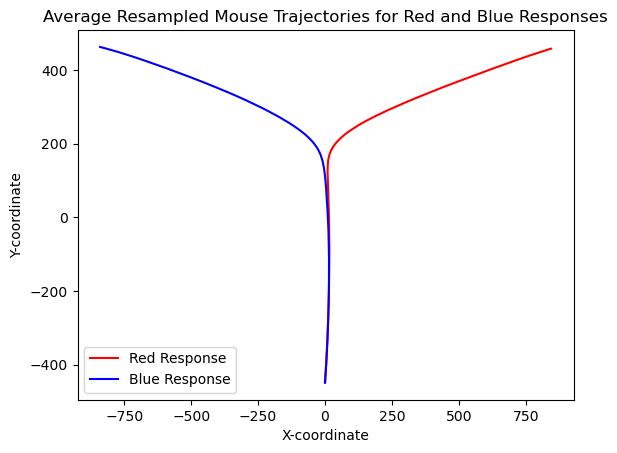

In [8]:

red_trajectories = df_red['traj_record'] # List of mouse trajectories for red responses
blue_trajectories = df_blue['traj_record']  # List of mouse trajectories for blue responses
# Find the maximum length of trajectories
max_length = max(len(traj) for traj in red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_average_trajectory = np.mean(resampled_red_trajectories, axis=0)


# Find the maximum length of trajectories
max_length = max(len(traj) for traj in blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

# Plot the average resampled trajectory for red and blue responses
plt.plot(red_average_trajectory[:, 0], red_average_trajectory[:, 1], label='Red Response', color='red')
plt.plot(blue_average_trajectory[:, 0], blue_average_trajectory[:, 1], label='Blue Response', color='blue')

# Customize the plot as needed
plt.title('Average Resampled Mouse Trajectories for Red and Blue Responses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

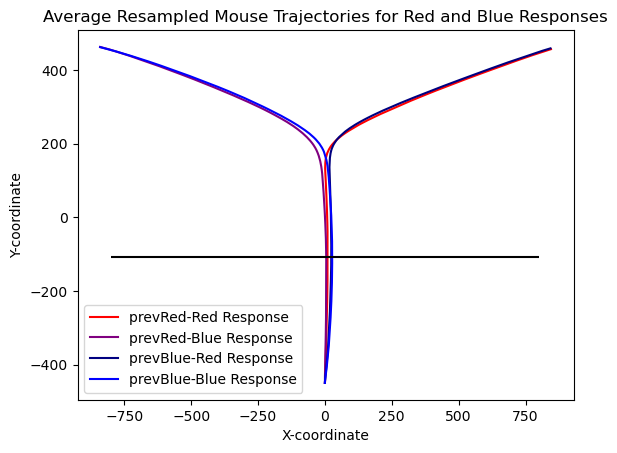

In [9]:
df_prev_red = df[df['previous_response'] == 'Blue']
df_prev_blue = df[df['previous_response'] == 'Red']
df_prev_red_red = df_prev_red[df_prev_red['choice'] == 'Red']
df_prev_red_blue = df_prev_red[df_prev_red['choice'] == 'Blue']
df_prev_blue_red = df_prev_blue[df_prev_blue['choice'] == 'Red']
df_prev_blue_blue = df_prev_blue[df_prev_blue['choice'] == 'Blue']
#df_red = df[df['choice'] == 'Red']
# Example data (replace with your actual data)
#red_trajectories = [...]  # List of mouse trajectories for red responses
prev_red_red_trajectories = df_prev_red_red['traj_record'] # List of mouse trajectories for red responses
prev_red_blue_trajectories = df_prev_red_blue['traj_record']
prev_blue_red_trajectories = df_prev_blue_red['traj_record']
prev_blue_blue_trajectories = df_prev_blue_blue['traj_record']

###################################################################

#blue_trajectories = df_blue['traj_record']  # List of mouse trajectories for blue responses
# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_red_red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_red_red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_red_average_trajectory = np.mean(resampled_red_trajectories, axis=0)

#####################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_red_blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_red_blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_blue_average_trajectory = np.mean(resampled_red_trajectories, axis=0)

######################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_blue_red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_blue_red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_red_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

#######################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_blue_blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_blue_blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_blue_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

#############################################################################

# Plot the average resampled trajectory for red and blue responses
plt.plot(red_red_average_trajectory[:, 0], red_red_average_trajectory[:, 1], label='prevRed-Red Response', color='red')
plt.plot(red_blue_average_trajectory[:, 0], red_blue_average_trajectory[:, 1], label='prevRed-Blue Response', color='purple')
plt.plot(blue_red_average_trajectory[:, 0], blue_red_average_trajectory[:, 1], label='prevBlue-Red Response', color='navy')
plt.plot(blue_blue_average_trajectory[:, 0], blue_blue_average_trajectory[:, 1], label='prevBlue-Blue Response', color='blue')
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'black')
# Customize the plot as needed
plt.title('Average Resampled Mouse Trajectories for Red and Blue Responses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

### Conclusion

After this we move on with the next script, which we will explore the data in more detail, there we will conduct proper data preprocesssing including visual inspection on mouse trajectory data